기존 불러오는 코드 그대로 작성

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##### Read the data (from kostat) #####
df_raw = pd.read_csv('data/2023_가구마스터_20240501_50723.csv',encoding='CP949')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows' , None)
print(df_raw.head(10))

   조사연도  MD제공용_가구고유번호          가중값 수도권여부  가구주_성별코드  가구원수 노인가구여부 조손가구여부  \
0  2023      10000162  1077.906572    G1         2     1     G1     G2   
1  2023      10000182  1086.438541    G1         1     2     G2     G2   
2  2023      10000192  3626.894382    G1         2     1     G2     G2   
3  2023      10000212   758.167174    G2         2     1     G1     G2   
4  2023      10000222  1404.353475    G2         1     1     G2     G2   
5  2023      10000262   928.191687    G2         2     2     G1     G2   
6  2023      10000272  1543.021409    G2         1     4     G2     G2   
7  2023      10000282  2233.473799    G2         1     5     G2     G2   
8  2023      10000312  2648.071261    G1         1     5     G2     G2   
9  2023      10000332  4854.753234    G1         2     2     G2     G2   

  한부모가구여부 다문화가구여부(2012년~) 장애인가구여부(2012년~)(보완)  가구주_교육정도_학력코드  가구주_교육정도_수학구분코드  \
0      G2              G2                  G2              2              1.0   
1      G2              

### 추가정보확인

In [6]:
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18094 entries, 0 to 18093
Columns: 160 entries, 조사연도 to 가구주_은퇴_생활비재원마련코드(2014년~)
dtypes: float64(21), int64(117), object(22)
memory usage: 22.1+ MB


,조사연도,MD제공용_가구고유번호,가중값,가구주_성별코드,가구원수,가구주_교육정도_학력코드,가구주_교육정도_수학구분코드,가구주_동거여부,가구주_만연령,가구주_종사상지위코드,가구주_혼인상태코드,입주형태코드,이사여부,자산,자산_금융자산,자산_금융자산_저축금액,자산_금융자산_저축_적립예치식저축금액,자산_금융자산_저축_적립예치식저축_수시적립예치식저축금액,자산_금융자산_저축_적립예치식저축_저축성보장성보험금액,자산_금융자산_저축_적립예치식저축_주식채권펀드금액,자산_금융자산_저축_기타저축금액,자산_금융자산_현거주지전월세보증금,자산_실물자산,자산_실물자산_부동산금액,자산_실물자산_부동산_거주주택금액,자산_실물자산_부동산_거주주택이외부동산금액,자산_실물자산_부동산_계약금중도금납입금액,자산_실물자산_기타실물자산,자산_실물자산_기타실물자산_자동차금액,자산_실물자산_기타실물자산_기타금액,자산_실물자산_기타실물자산_기타_자동차이외기타실물자산,자산_실물자산_기타실물자산_기타_권리금,부채,부채_금융부채,부채_금융부채_담보대출금액,부채_금융부채_담보대출_대출용도_거주주택구입금액,부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_담보대출_대출용도_전월세보증금마련금액,부채_금융부채_담보대출_대출용도_부채상환금액,부채_금융부채_담보대출_대출용도_사업자금마련금액,부채_금융부채_담보대출_대출용도_생활비마련금액,부채_금융부채_담보대출_대출용도_기타용도금액,부채_금융부채_담보대출_대출기관_은행금액(2010년은 농수협 중앙회 제외),부채_금융부채_담보대출_대출기관_저축은행금액,부채_금융부채_담보대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함),부채_금융부채_담보대출_대출기관_보험회사금액,부채_금융부채_담보대출_대출기관_기타기관금액,부채_금융부채_담보대출_상환방법_만기일시금액,부채_금융부채_담보대출_상환방법_원금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_담보대출_상환방법_기타상환방법금액,부채_금융부채_담보대출_담보형태_거주주택금액,부채_금융부채_담보대출_담보형태_거주주택이외부동산금액,부채_금융부채_담보대출_담보형태_예적금보험펀드채권금액,부채_금융부채_담보대출_담보형태_기타금액,부채_금융부채_담보대출_부동산담보대출금액,부채_금융부채_담보대출_부동산이외담보대출금액,부채_금융부채_신용대출금액,부채_금융부채_신용대출_대출용도_거주주택구입금액,부채_금융부채_신용대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_신용대출_대출용도_전월세보증금마련금액,부채_금융부채_신용대출_대출용도_부채상환금액,부채_금융부채_신용대출_대출용도_사업자금마련금액,부채_금융부채_신용대출_대출용도_생활비마련금액,부채_금융부채_신용대출_대출용도_기타용도금액,부채_금융부채_신용대출_대출기관_은행금액(2010년은 농수협 중앙회 제외),부채_금융부채_신용대출_대출기관_저축은행금액,부채_금융부채_신용대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함),부채_금융부채_신용대출_대출기관_보험회사금액,부채_금융부채_신용대출_대출기관_기타기관금액,부채_금융부채_신용대출_상환방법_만기일시금액,부채_금융부채_신용대출_상환방법_원금분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_신용대출_상환방법_기타상환방법금액,부채_금융부채_신용대출_대출종류_신용대출금액,부채_금융부채_신용대출_대출종류_마이너스통장금액,부채_금융부채_신용카드관련대출금액,부채_금융부채_외상할부미상환금액,부채_금융부채_계탄후불입금액,부채_금융부채_개인직장빌린금액(2017년~),부채_임대보증금,원리금상환금액,원리금상환_원금상환금액,원리금상환_이자지급금액,순자산,경상소득(보완),경상소득_근로소득(보완),경상소득_사업소득(보완),경상소득_재산소득(보완),경상소득_공적이전소득(보완),경상소득_사적이전소득(조사),이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)],처분가능소득(보완)[경상소득(보완)-비소비지출(보완)],지출_소비지출비,지출_소비지출_식료품(외식비포함),지출_소비지출_주거비,지출_소비지출_교육비(보육료포함),지출_소비지출_의료비,지출_소비지출_교통비,지출_소비지출_통신비,지출_소비지출_기타소비지출비,지출(보완)[비소비지출(보완)+소비지출(조사)](2012~2018년: 복지^ 2019년~:공통),지출_비소비지출(보완),지출_비소비지출_세금(보완),지출_비소비지출_공적연금사회보험료(보완),지출_비소비지출_가구간이전지출(조사),지출_비소비지출_비영리단체이전지출액(조사2),지출_비소비지출_연간지급이자(조사2),여유자금운용계획코드,금융자산투자운용방법코드,금융자산투자고려사항코드,거주지주택가격전망코드,여유자금부동산투자여부,부동산투자주목적코드,투자선호부동산코드,부동산투자기피사유코드,1년후금융부채규모전망코드,부채증가원인코드,1년전대비부채증감코드,부채상환방법코드,원리금연체여부,원리금연체사유코드,30일이상원리금연체여부,원리금상환_생계부담정도코드,원리금상환_생계부담_소득대비상환액비중,원리금상환_가계지출감소여부,원리금상환_가계지출감소항목코드,부채상환가능시기코드,가구주_은퇴여부,가구주_미은퇴_은퇴연령,가구주_미은퇴_최소생활비,가구주_미은퇴_적정생활비,가구주_미은퇴_노후준비상황코드,가구주_은퇴_은퇴연령,가구주_은퇴_적정생활비충당여부,가구주_은퇴_생활비재원마련코드(2014년~)
count,18094.0,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,17286.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,1.809400e+04,1.809400e+04,1.809400e+04,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,1.809400e+04,1.809400e+04,18094.000000,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.00000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,180

### Q0. 데이터프레임 이름 변경

In [11]:
# 원하는 컬럼만 새로운 df로 복사하기
df_select = df_raw[['조사연도', '수도권여부', 'MD제공용_가구고유번호', '가구주_성별코드', '가구주_만연령', '가구원수', '가구주_교육정도_학력코드', '가구주_혼인상태코드', '자산', '부채', '처분가능소득(보완)[경상소득(보완)-비소비지출(보완)]', '가구주_산업대분류코드', '가구주_직업대분류코드', '입주형태코드']].copy()
# 컬럼들 이름 변경
df_select.rename(columns={
    '조사연도': 'year',
    '수도권여부': 'metro',
    'MD제공용_가구고유번호': 'id',
    '가구주_성별코드': 'sex',
    '가구주_만연령': 'age',
    '가구원수': 'number',
    '가구주_교육정도_학력코드': 'education',
    '가구주_혼인상태코드': 'marriage',
    '자산': 'asset',
    '부채': 'debt',
    '처분가능소득(보완)[경상소득(보완)-비소비지출(보완)]': 'income',
    '가구주_산업대분류코드': 'industry',
    '가구주_직업대분류코드': 'job',
    '입주형태코드': 'house'
}, inplace=True)

# Q1. 데이터프레임 정보출력

In [13]:
df_select.info()
df_select.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18094 entries, 0 to 18093
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       18094 non-null  int64 
 1   metro      18094 non-null  object
 2   id         18094 non-null  int64 
 3   sex        18094 non-null  int64 
 4   age        18094 non-null  int64 
 5   number     18094 non-null  int64 
 6   education  18094 non-null  int64 
 7   marriage   18094 non-null  int64 
 8   asset      18094 non-null  int64 
 9   debt       18094 non-null  int64 
 10  income     18094 non-null  int64 
 11  industry   13356 non-null  object
 12  job        13356 non-null  object
 13  house      18094 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.9+ MB


,year,id,sex,age,number,education,marriage,asset,debt,income,house
count,18094.0,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,1.809400e+04,18094.000000,18094.000000,18094.000000
mean,2023.0,4.865128e+08,1.286338,58.681386,2.308832,4.258428,2.279043,5.005981e+04,7608.145849,5053.512656,1.797557
std,0.0,2.859796e+08,0.452062,15.342394,1.202952,1.626067,0.832853,8.903165e+04,19786.243535,4935.612087,1.190417
min,2023.0,1.000016e+07,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,-22848.000000,1.000000
25%,2023.0,2.320003e+08,1.000000,47.250000,1.000000,3.000000,2.000000,8.512500e+03,0.000000,1977.000000,1.000000
50%,2023.0,4.909003e+08,1.000000,59.000000,2.000000,4.000000,2.000000,2.624800e+04,500.000000,3890.500000,1.000000
75%,2023.0,7.232003e+08,2.000000,70.000000,3.000000,6.000000,3.000000,5.912900e+04,7900.000000,6751.000000,3.000000
max,2023.0,9.919003e+08,2.000000,105.000000,10.000000,8.000000,4.000000,3.667350e+06,807000.000000,223958.000000,5.000000


# Q2. Choose the ‘income’ column and show the descriptive statistics as below:

In [14]:
df_select.income.describe()

count     18094.000000
mean       5053.512656
std        4935.612087
min      -22848.000000
25%        1977.000000
50%        3890.500000
75%        6751.000000
max      223958.000000
Name: income, dtype: float64

# Q3. Plot the distribution of income as below with ‘seaborn’ package

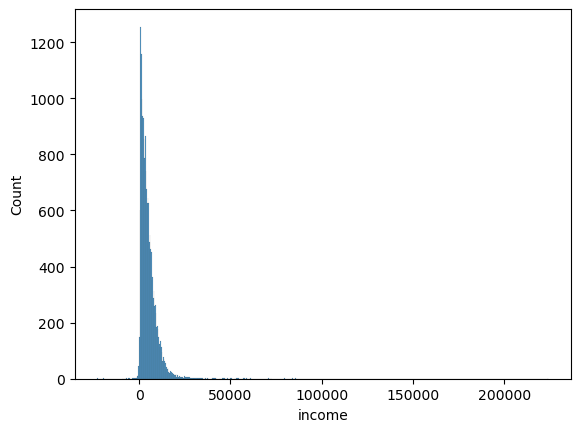

In [19]:
sns.histplot(data=df_select, x='income')
plt.show()

Q4. Plot the distribution of income as below with ‘seaborn’ package

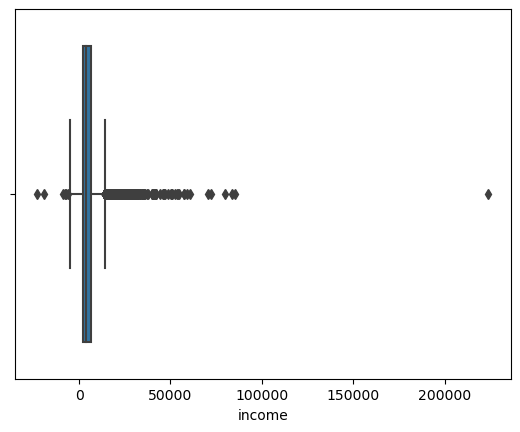

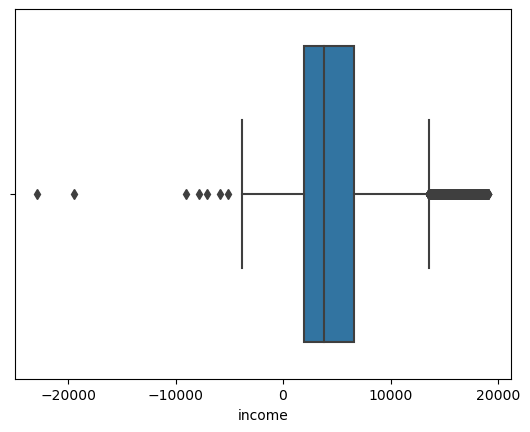

In [22]:
fare_q3 = df_select['income'].quantile(q=0.75)
fare_q1 = df_select['income'].quantile(q=0.25)
fare_iqr= fare_q3 -fare_q1
condition = df_select['income'] <= 4*fare_iqr
new_df_select= df_select[condition]
sns.boxplot(data=df_select, x='income')
plt.show()
sns.boxplot(data=new_df_select, x='income')
plt.show()

Q5. Randomly sample 500 households 10,000 times & draw a histogram with the averages
of each sampling data

In [25]:
iterationNum = 10000
income_bootsample_list = []
for _ in range(iterationNum):
    bootSample = df_select.sample(500, replace=True) # 복원 추출(뺀게 사라지지 않음)
    bootSample_income_mean = bootSample.income.mean()
    income_bootsample_list.append(bootSample_income_mean)

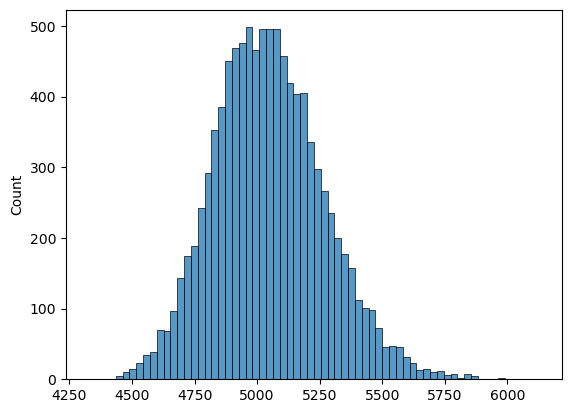

In [26]:
sns.histplot(data=income_bootsample_list)
plt.show()

Q6. Find the confidence interval with 99.7% of confidence as below when we randomly
sample 500 households 10,000 times

In [31]:
print(f"Mean of Incomes : {np.mean(income_bootsample_list):.4f}")
print(f"SE of Incomes : {np.std(income_bootsample_list):.4f}")
print(f"CI with 99.7% : {np.percentile(income_bootsample_list, 0.3):.4f}~{np.percentile(income_bootsample_list, 99.7):.4f}")

Mean of Incomes : 5047.5084
SE of Incomes : 220.3903
CI with 99.7% : 4515.6067~5754.6932


Q7. Calculate the average of incomes for the population


In [33]:
print(f"Mean of Incomes : {np.mean(df_select.income):.4f}")

Mean of Incomes : 5053.5127


Q8. Is the average of incomes for the population included in the CI of Q6?

In [34]:
print(f"네, 500개씩 10,000회 복원추출한 평균은 {np.mean(income_bootsample_list):.4f}이고, 99.7%의 CI구간은 {np.percentile(income_bootsample_list, 0.3):.4f}~{np.percentile(income_bootsample_list, 99.7):.4f}입니다. 모집단의 평균은 {np.mean(df_select.income):.4f}이므로 이것은 CI구간에 포함됩니다.")

네, 500개씩 10,000회 복원추출한 평균은 5047.5084이고, 99.7%의 CI구간은 4515.6067~5754.6932입니다. 모집단의 평균은 5053.5127이므로 이것은 CI구간에 포함됩니다.
